dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification

# BUSSINESS UNDERSTANDING

Saat ini, banyak orang yang menajadika jamur sebagai makanan favoritnya. Dikarenakan jamur sendiri dibagi menjadi 2 jenis yaitu yang dapat dimakan dan yang tidak dapat dimakan (beracun). Dengan ini diperlukan pembuatan model guna mengklasifikasi mana jamur yang aman untuk dimakan dan mana yang tidak.

Model ini dibuat menggunakan metode klasifikasi dan algoritma Support Vector Classifier (SVC) dengan inputan:


1. Tentukan Library yang digunakan

In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

2. Load Dataset

In [76]:
jamur_dataset = pd.read_csv('jamur.csv')

# DATA UNDERSTANDING


Informasi Atribut: 

class : kelas, dapat dimakan=e, beracun=p)

cap-shape: bentuk topi, lonceng=b,kerucut=c,cembung=x,datar=f, tombol-tombol=k,cekung=s

cap-surface: tutup-permukaan, berserat = f, alur = g, bersisik = y, halus = s

cap-color: warna topi, coklat=n,buff=b,kayu manis=c,abu-abu=g,hijau=r,merah muda=p,ungu=u,merah=e,putih=w,kuning=y

bruises: perubahan warna atau perubahan pada permukaan jamur setelah ditekan atau terluka secara fisik, bruises=t, no=f

odor: bau, almond=a,anise=l,creosote=c,fishy=y,foul=f,apak=m,none=n,pedas=p,pedas=s

gill-attachment: lampiran insang, terpasang = a,bebas = f

gill-spacing: jarak insang, dekat=c, ramai=w, jauh=d

gill-size: ukuran insang, luas=b, sempit=n

gill-color: warna insang, hitam=k,coklat=n,buff=b,coklat=h,abu-abu=g, hijau=r,oranye=o,merah muda=p,ungu=u,merah=e,putih=w,kuning= y

population: populasi, melimpah=a,berkerumun=c,berjumlah=n,tersebar=s,beberapa=v,soliter=y

habitat: habitat, rumput=g,daun=l,padang rumput=m,jalur=p,perkotaan=u,limbah=w,hutan=d

In [77]:
jamur_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,s,u
1,e,x,s,y,t,a,f,c,b,k,n,g
2,e,b,s,w,t,l,f,c,b,n,n,m
3,p,x,y,w,t,p,f,c,n,n,s,u
4,e,x,s,g,f,n,f,w,b,k,a,g


In [78]:
jamur_dataset.shape

(8124, 12)

In [79]:
jamur_dataset['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [80]:
jamur_dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'population', 'habitat'],
      dtype='object')

# DATA PREPARATION

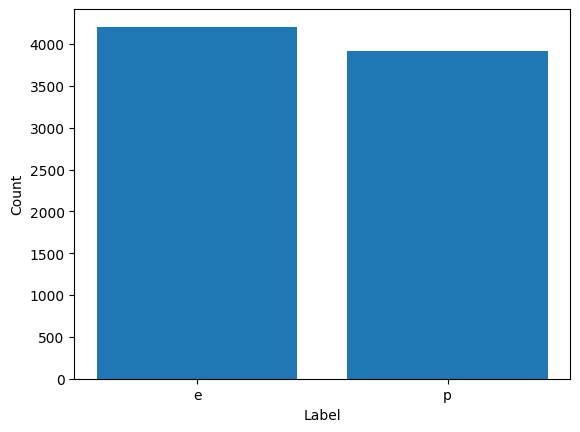

In [81]:
# Get the distribution of the labels
labels = jamur_dataset['class'].value_counts()

# Plot the distribution
plt.bar(labels.index, labels.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [82]:
jamur_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,s,u
1,e,x,s,y,t,a,f,c,b,k,n,g
2,e,b,s,w,t,l,f,c,b,n,n,m
3,p,x,y,w,t,p,f,c,n,n,s,u
4,e,x,s,g,f,n,f,w,b,k,a,g


In [83]:
kelas = jamur_dataset['class'].unique()
bentuk = jamur_dataset['cap-shape'].unique()
permukaan = jamur_dataset['cap-surface'].unique()
warna = jamur_dataset['cap-color'].unique()
memar = jamur_dataset['bruises'].unique()
bau = jamur_dataset['odor'].unique()
lampiran = jamur_dataset['gill-attachment'].unique()
jarak = jamur_dataset['gill-spacing'].unique()
ukuran = jamur_dataset['gill-size'].unique()
warna2 = jamur_dataset['gill-color'].unique()
populasi = jamur_dataset['population'].unique()
tempat = jamur_dataset['habitat'].unique()

print("Kelas:", kelas)
print("Bentuk:", bentuk)
print("Permukaan:", permukaan)
print("Warna:", warna)
print("Memar:", memar)
print("Bau:", bau)
print("Lampiran:", lampiran)
print("Jarak:", jarak)
print("Ukuran:", ukuran)
print("Warna2:", warna2)
print("Populasi:", populasi)
print("Tempat:", tempat)


Kelas: ['p' 'e']
Bentuk: ['x' 'b' 's' 'f' 'k' 'c']
Permukaan: ['s' 'y' 'f' 'g']
Warna: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Memar: ['t' 'f']
Bau: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Lampiran: ['f' 'a']
Jarak: ['c' 'w']
Ukuran: ['n' 'b']
Warna2: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Populasi: ['s' 'n' 'a' 'v' 'y' 'c']
Tempat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [84]:
jamur_dataset['class'] = jamur_dataset['class'].replace(['p','e'], [1,0])
jamur_dataset['cap-shape'] = jamur_dataset['cap-shape'].replace(['x','b','s','f','k','c'], [0,1,2,3,4,5])
jamur_dataset['cap-surface'] = jamur_dataset['cap-surface'].replace(['s','y','f','g'], [0,1,2,3])
jamur_dataset['cap-color'] = jamur_dataset['cap-color'].replace(['n','y','w','g','e', 'p', 'b', 'u', 'c', 'r'], [0,1,2,3,4,5,6,7,8,9])
jamur_dataset['bruises'] = jamur_dataset['bruises'].replace(['t', 'f'], [1,0])
jamur_dataset['odor'] = jamur_dataset['odor'].replace(['p', 'a', 'l', 'n' ,'f' ,'c' ,'y', 's' ,'m'], [0,1,2,3,4,5,6,7,8])
jamur_dataset['gill-attachment'] = jamur_dataset['gill-attachment'].replace(['f', 'a'], [1,0])
jamur_dataset['gill-spacing'] = jamur_dataset['gill-spacing'].replace(['c', 'w'], [1,0])
jamur_dataset['gill-size'] = jamur_dataset['gill-size'].replace(['n', 'b'], [1,0])
jamur_dataset['gill-color'] = jamur_dataset['gill-color'].replace(['k', 'n' ,'g' ,'p', 'w' ,'h' ,'u' ,'e' ,'b', 'r', 'y', 'o'], [0,1,2,3,4,5,6,7,8,9,10,11])
jamur_dataset['population'] = jamur_dataset['population'].replace(['s', 'n' ,'a', 'v', 'y' ,'c'], [0,1,2,3,4,5])
jamur_dataset['habitat'] = jamur_dataset['habitat'].replace(['u', 'g', 'm' ,'d', 'p' ,'w' ,'l'], [0,1,2,3,4,5,6])

jamur_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,population,habitat
0,1,0,0,0,1,0,1,1,1,0,0,0
1,0,0,0,1,1,1,1,1,0,0,1,1
2,0,1,0,2,1,2,1,1,0,1,1,2
3,1,0,1,2,1,0,1,1,1,1,0,0
4,0,0,0,3,0,3,1,0,0,0,2,1


In [85]:
kelas = jamur_dataset['class'].unique()
bentuk = jamur_dataset['cap-shape'].unique()
permukaan = jamur_dataset['cap-surface'].unique()
warna = jamur_dataset['cap-color'].unique()
memar = jamur_dataset['bruises'].unique()
bau = jamur_dataset['odor'].unique()
lampiran = jamur_dataset['gill-attachment'].unique()
jarak = jamur_dataset['gill-spacing'].unique()
ukuran = jamur_dataset['gill-size'].unique()
warna2 = jamur_dataset['gill-color'].unique()
populasi = jamur_dataset['population'].unique()
tempat = jamur_dataset['habitat'].unique()

print("Kelas:", kelas)
print("Bentuk:", bentuk)
print("Permukaan:", permukaan)
print("Warna:", warna)
print("Memar:", memar)
print("Bau:", bau)
print("Lampiran:", lampiran)
print("Jarak:", jarak)
print("Ukuran:", ukuran)
print("Warna2:", warna2)
print("Populasi:", populasi)
print("Tempat:", tempat)

Kelas: [1 0]
Bentuk: [0 1 2 3 4 5]
Permukaan: [0 1 2 3]
Warna: [0 1 2 3 4 5 6 7 8 9]
Memar: [1 0]
Bau: [0 1 2 3 4 5 6 7 8]
Lampiran: [1 0]
Jarak: [1 0]
Ukuran: [1 0]
Warna2: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Populasi: [0 1 2 3 4 5]
Tempat: [0 1 2 3 4 5 6]


# MODELLING

In [86]:
# memisahkan data dan label
X = jamur_dataset.drop (columns='class', axis=1)
Y = jamur_dataset['class']

In [87]:
print(X)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment   
0             0            0          0        1     0                1  \
1             0            0          1        1     1                1   
2             1            0          2        1     2                1   
3             0            1          2        1     0                1   
4             0            0          3        0     3                1   
...         ...          ...        ...      ...   ...              ...   
8119          4            0          0        0     3                0   
8120          0            0          0        0     3                0   
8121          3            0          0        0     3                0   
8122          4            1          0        0     6                1   
8123          0            0          0        0     3                0   

      gill-spacing  gill-size  gill-color  population  habitat  
0                1          1     

In [88]:
print(Y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


3. Standarisasi Data

In [89]:
scaler = StandardScaler()

In [90]:
scaler.fit(X)

StandardScaler()

In [91]:
standarized_data = scaler.transform(X)

In [92]:
print(standarized_data)

[[-1.03067919 -1.25332348 -1.19995752 ... -1.60114943 -1.94613652
  -1.72783347]
 [-1.03067919 -1.25332348 -0.62678873 ... -1.60114943 -1.22208389
  -1.10957593]
 [-0.40130173 -1.25332348 -0.05361993 ... -1.22654575 -1.22208389
  -0.4913184 ]
 ...
 [ 0.8574532  -1.25332348 -1.19995752 ... -1.22654575  1.67412659
   1.98171175]
 [ 1.48683066  0.03619019 -1.19995752 ...  1.39567996  0.22602135
   1.98171175]
 [-1.03067919 -1.25332348 -1.19995752 ...  2.1448873   1.67412659
   1.98171175]]


In [93]:
X = standarized_data
Y = jamur_dataset['class']

In [94]:
print(X)
print(Y)

[[-1.03067919 -1.25332348 -1.19995752 ... -1.60114943 -1.94613652
  -1.72783347]
 [-1.03067919 -1.25332348 -0.62678873 ... -1.60114943 -1.22208389
  -1.10957593]
 [-0.40130173 -1.25332348 -0.05361993 ... -1.22654575 -1.22208389
  -0.4913184 ]
 ...
 [ 0.8574532  -1.25332348 -1.19995752 ... -1.22654575  1.67412659
   1.98171175]
 [ 1.48683066  0.03619019 -1.19995752 ...  1.39567996  0.22602135
   1.98171175]
 [-1.03067919 -1.25332348 -1.19995752 ...  2.1448873   1.67412659
   1.98171175]]
0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [96]:
print(X.shape, X_train.shape, X_test.shape)

(8124, 11) (6499, 11) (1625, 11)


5. Membuat data latih menggunakan algoritma SVM

In [97]:
classifier = svm.SVC(kernel='linear')

In [98]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

6. membuat model evaluasi untuk mengukur tingkat akurasi

In [99]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [100]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.971226342514233


In [101]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [102]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.9735384615384616


In [104]:
jamur_dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,population,habitat
0,1,0,0,0,1,0,1,1,1,0,0,0
1,0,0,0,1,1,1,1,1,0,0,1,1
2,0,1,0,2,1,2,1,1,0,1,1,2
3,1,0,1,2,1,0,1,1,1,1,0,0
4,0,0,0,3,0,3,1,0,0,0,2,1


7. Membuat Model Prediksi

In [108]:
input_data = (0,0,0,1,0,1,1,1,0,0,0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshape)
print(prediction)
print()

if (prediction[0] == 0):
    print('Jamur Tidak Beracun')
else :
    print('Jamur Beracun')

[1]

Jamur Beracun


8. simpan model

In [106]:
import pickle

In [107]:
filename = 'klasifikasi_jamur.sav'
pickle.dump(classifier, open(filename,'wb'))